In [32]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import brentq
from scipy.stats import norm

In [2]:
file_path = Path("round-4-island-data-bottle")

In [7]:
if file_path.exists():
    df_day_1 = pd.read_csv(file_path / "prices_round_4_day_1.csv", delimiter=";")
    df_day_2 = pd.read_csv(file_path / "prices_round_4_day_2.csv", delimiter=";")
    df_day_3 = pd.read_csv(file_path / "prices_round_4_day_3.csv", delimiter=";")
    print("File loaded successfully.")
else:
    print("File not found. Please ensure the file exists at:", file_path)

df_day_1["timestamp"] = pd.to_numeric(df_day_1["timestamp"])
df_day_2["timestamp"] = pd.to_numeric(df_day_2["timestamp"])
df_day_3["timestamp"] = pd.to_numeric(df_day_3["timestamp"])

File loaded successfully.


In [13]:
df_day_1

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,1,0,COCONUT,9999,200,NaN,NaN,NaN,NaN,10001,200,NaN,NaN,NaN,NaN,10000.0,0.0
1,1,0,COCONUT_COUPON,637,39,NaN,NaN,NaN,NaN,638,39,NaN,NaN,NaN,NaN,637.5,0.0
2,1,100,COCONUT,9999,104,9998.0,44.0,NaN,NaN,10000,104,10001.0,44.0,NaN,NaN,9999.5,0.0
3,1,100,COCONUT_COUPON,637,33,NaN,NaN,NaN,NaN,638,33,NaN,NaN,NaN,NaN,637.5,0.0
4,1,200,COCONUT,9998,133,9997.0,62.0,NaN,NaN,9999,133,10000.0,62.0,NaN,NaN,9998.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1,999700,COCONUT_COUPON,681,46,NaN,NaN,NaN,NaN,682,46,NaN,NaN,NaN,NaN,681.5,0.0
19996,1,999800,COCONUT_COUPON,681,43,NaN,NaN,NaN,NaN,682,43,NaN,NaN,NaN,NaN,681.5,0.0
19997,1,999800,COCONUT,10134,122,10133.0,65.0,NaN,NaN,10136,181,NaN,NaN,NaN,NaN,10135.0,0.0
19998,1,999900,COCONUT_COUPON,682,36,NaN,NaN,NaN,NaN,683,36,NaN,NaN,NaN,NaN,682.5,0.0


In [38]:
coconut_data = df_day_1[df_day_1["product"] == "COCONUT"]
coupon_data = df_day_1[df_day_1["product"] == "COCONUT_COUPON"]

In [39]:
coconut_data.head(5)

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,1,0,COCONUT,9999,200,NaN,NaN,NaN,NaN,10001,200,NaN,NaN,NaN,NaN,10000.0,0.0
2,1,100,COCONUT,9999,104,9998.0,44.0,NaN,NaN,10000,104,10001.0,44.0,NaN,NaN,9999.5,0.0
4,1,200,COCONUT,9998,133,9997.0,62.0,NaN,NaN,9999,133,10000.0,62.0,NaN,NaN,9998.5,0.0
7,1,300,COCONUT,9999,149,9998.0,51.0,NaN,NaN,10000,149,10001.0,51.0,NaN,NaN,9999.5,0.0
8,1,400,COCONUT,9998,108,9997.0,63.0,NaN,NaN,9999,103,10000.0,63.0,NaN,NaN,9998.5,0.0


/var/folders/k7/83tjk1tn08x8p9kpdnsx45zh0000gp/T/ipykernel_90744/1678055287.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coconut_data["price_diff"] = coconut_data["mid_price"].diff()
/var/folders/k7/83tjk1tn08x8p9kpdnsx45zh0000gp/T/ipykernel_90744/1678055287.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coconut_data["volatility"] = (


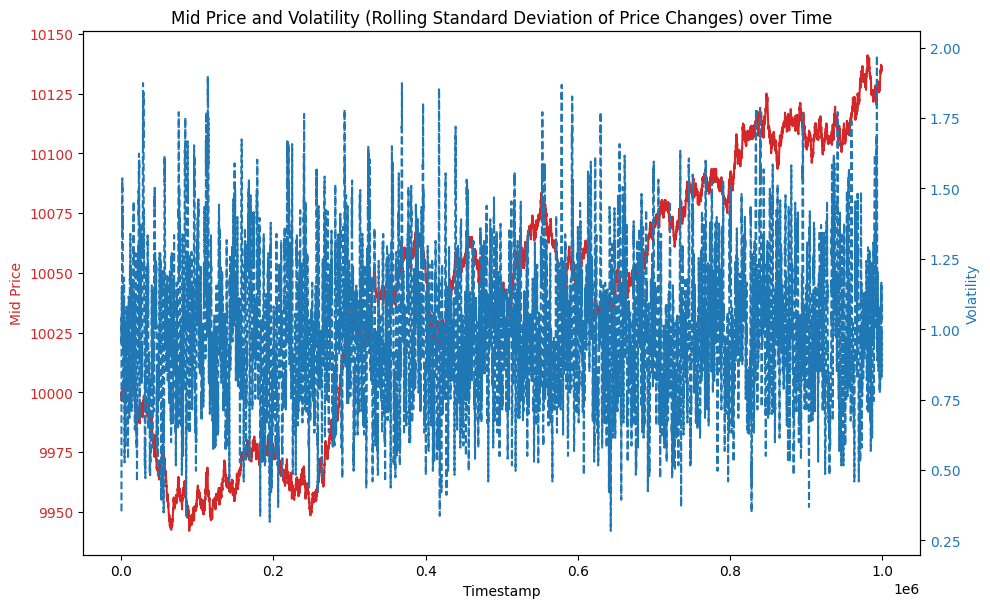

In [52]:
# Calculate the differences in mid_price from one timestamp to the next
coconut_data["price_diff"] = coconut_data["mid_price"].diff()

# Calculate rolling standard deviation of the price differences (volatility)
window_size = 10  # Change window size as per your data size or requirements
coconut_data["volatility"] = (
    coconut_data["price_diff"].rolling(window=window_size, min_periods=1).std()
)

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

color = "tab:red"
ax1.set_xlabel("Timestamp")
ax1.set_ylabel("Mid Price", color=color)
ax1.plot(
    coconut_data["timestamp"], coconut_data["mid_price"], color=color, label="Mid Price"
)
ax1.tick_params(axis="y", labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = "tab:blue"
ax2.set_ylabel("Volatility", color=color)
ax2.plot(
    coconut_data["timestamp"],
    coconut_data["volatility"],
    color=color,
    linestyle="--",
    label="Volatility",
)
ax2.tick_params(axis="y", labelcolor=color)

fig.tight_layout()
plt.title(
    "Mid Price and Volatility (Rolling Standard Deviation of Price Changes) over Time"
)
plt.show()

/var/folders/k7/83tjk1tn08x8p9kpdnsx45zh0000gp/T/ipykernel_90744/3463967754.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coconut_data["vol"] = log_returns.rolling(window=21).std() * np.sqrt(250)


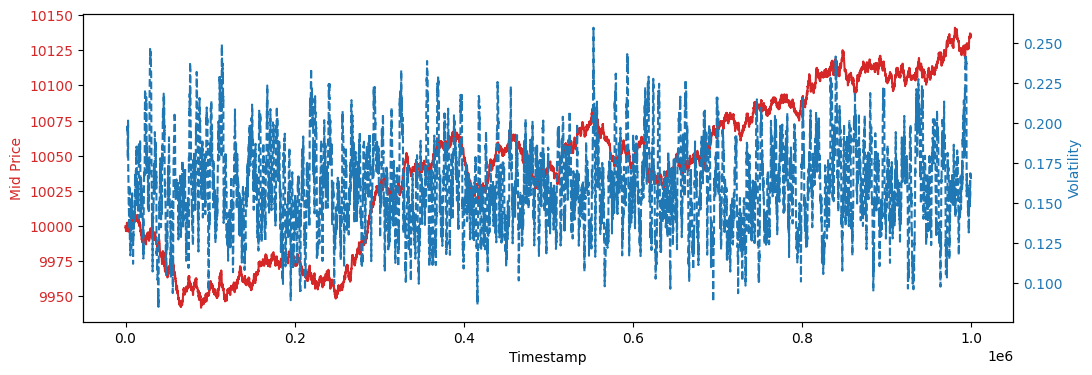

In [59]:
# https://www.youtube.com/watch?v=ZrXM0KizUsM&t=1528s
log_returns = np.log(
    coconut_data["mid_price"] / coconut_data["mid_price"].shift(1)
).dropna()

coconut_data["vol"] = log_returns.rolling(window=21).std() * np.sqrt(250)

# fig,ax=plt.subplots((figsize=(12,4)))
# ax.plot(coconut_data['mid_price'], color='tab:blue')
# ax2=ax.twinx()
# ax2.plot(coconut_data['vol']*100, color='tab:red')
# ax.set_xlabel("Timestamp")

# Plotting
fig, ax = plt.subplots(figsize=(12, 4))
ax.set_xlabel("Timestamp")
ax.set_ylabel("Mid Price", color="tab:red")
ax.plot(
    coconut_data["timestamp"],
    coconut_data["mid_price"],
    color="tab:red",
    label="Mid Price",
)
ax.tick_params(axis="y", labelcolor="tab:red")

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis
color = "tab:blue"
ax2.set_ylabel("Volatility", color=color)  # we already handled the x-label with ax
ax2.plot(
    coconut_data["timestamp"],
    coconut_data["vol"] * 100,
    color=color,
    label="Volatility",
    linestyle="--",
)
ax2.tick_params(axis="y", labelcolor=color)

In [60]:
coconut_data

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,price_diff,volatility,vol
0,1,0,COCONUT,9999,200,NaN,NaN,NaN,NaN,10001,200,NaN,NaN,NaN,NaN,10000.0,0.0,NaN,NaN,NaN
2,1,100,COCONUT,9999,104,9998.0,44.0,NaN,NaN,10000,104,10001.0,44.0,NaN,NaN,9999.5,0.0,-0.5,NaN,NaN
4,1,200,COCONUT,9998,133,9997.0,62.0,NaN,NaN,9999,133,10000.0,62.0,NaN,NaN,9998.5,0.0,-1.0,0.353553,NaN
7,1,300,COCONUT,9999,149,9998.0,51.0,NaN,NaN,10000,149,10001.0,51.0,NaN,NaN,9999.5,0.0,1.0,1.040833,NaN
8,1,400,COCONUT,9998,108,9997.0,63.0,NaN,NaN,9999,103,10000.0,63.0,NaN,NaN,9998.5,0.0,-1.0,0.946485,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19991,1,999500,COCONUT,10135,103,10134.0,51.0,NaN,NaN,10136,111,10137.0,51.0,NaN,NaN,10135.5,0.0,-0.5,1.110555,0.001676
19993,1,999600,COCONUT,10136,130,10135.0,67.0,NaN,NaN,10137,130,10138.0,67.0,NaN,NaN,10136.5,0.0,1.0,0.831665,0.001676
19994,1,999700,COCONUT,10134,108,10133.0,54.0,NaN,NaN,10135,108,10136.0,54.0,NaN,NaN,10134.5,0.0,-2.0,0.978945,0.001676
19997,1,999800,COCONUT,10134,122,10133.0,65.0,NaN,NaN,10136,181,NaN,NaN,NaN,NaN,10135.0,0.0,0.5,1.001388,0.001653


/var/folders/k7/83tjk1tn08x8p9kpdnsx45zh0000gp/T/ipykernel_90744/2056710479.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coconut_data["log_returns"] = np.log(
/var/folders/k7/83tjk1tn08x8p9kpdnsx45zh0000gp/T/ipykernel_90744/2056710479.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coconut_data["volatility"] = coconut_data["log_returns"].expanding(min_periods=2).std()


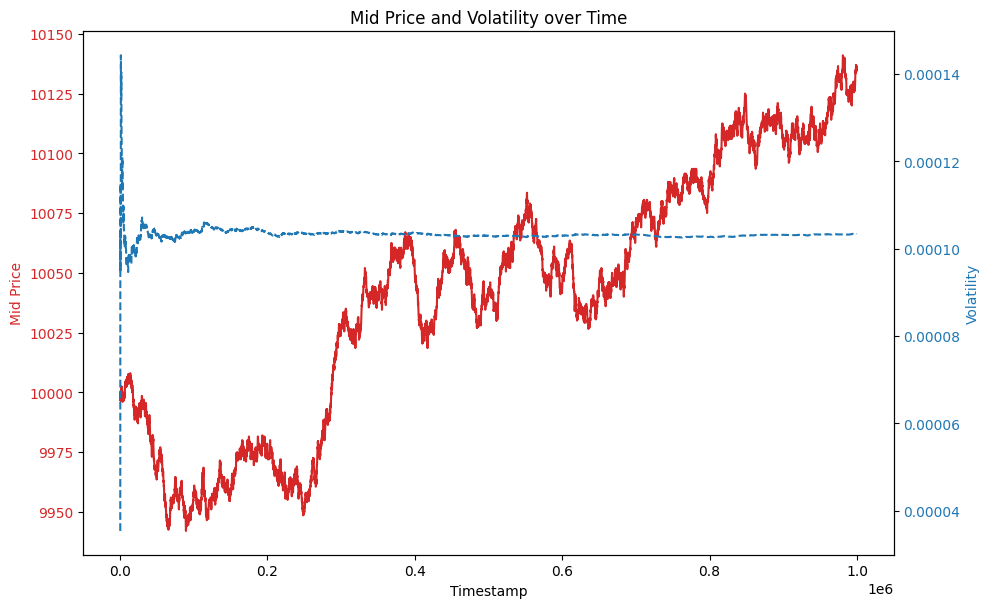

In [36]:
# Calculate logarithmic returns
coconut_data["log_returns"] = np.log(
    coconut_data["mid_price"] / coconut_data["mid_price"].shift(1)
)

# Calculate cumulative standard deviation of the returns to estimate volatility
coconut_data["volatility"] = coconut_data["log_returns"].expanding(min_periods=2).std()

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

color = "tab:red"
ax1.set_xlabel("Timestamp")
ax1.set_ylabel("Mid Price", color=color)
ax1.plot(
    coconut_data["timestamp"], coconut_data["mid_price"], color=color, label="Mid Price"
)
ax1.tick_params(axis="y", labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = "tab:blue"
ax2.set_ylabel("Volatility", color=color)  # we already handled the x-label with ax1
ax2.plot(
    coconut_data["timestamp"],
    coconut_data["volatility"],
    color=color,
    label="Volatility",
    linestyle="--",
)
ax2.tick_params(axis="y", labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title("Mid Price and Volatility over Time")
plt.show()

In [30]:
# Calculate logarithmic returns
coconut_data["log_returns"] = np.log(
    coconut_data["mid_price"] / coconut_data["mid_price"].shift(1)
)

# Calculate cumulative standard deviation of the returns to estimate volatility
coconut_data["volatility"] = coconut_data["log_returns"].expanding(min_periods=2).std()

# Adjust the annualization factor if needed. Here it's assumed there are approximately 252 trading days in a year:
coconut_data["annualized_volatility"] = coconut_data["volatility"] * np.sqrt(250)

coconut_data

/var/folders/k7/83tjk1tn08x8p9kpdnsx45zh0000gp/T/ipykernel_90744/1890946163.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coconut_data["log_returns"] = np.log(
/var/folders/k7/83tjk1tn08x8p9kpdnsx45zh0000gp/T/ipykernel_90744/1890946163.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coconut_data["volatility"] = coconut_data["log_returns"].expanding(min_periods=2).std()
/var/folders/k7/83tjk1tn08x8p9kpdnsx45zh0000gp/T/ipykernel_90744/1890946163.py:10: SettingWithCopyWarning: 
A value is trying to b

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,log_returns,volatility,annualized_volatility
0,1,0,COCONUT,9999,200,NaN,NaN,NaN,NaN,10001,200,NaN,NaN,NaN,NaN,10000.0,0.0,NaN,NaN,NaN
2,1,100,COCONUT,9999,104,9998.0,44.0,NaN,NaN,10000,104,10001.0,44.0,NaN,NaN,9999.5,0.0,-0.000050,NaN,NaN
4,1,200,COCONUT,9998,133,9997.0,62.0,NaN,NaN,9999,133,10000.0,62.0,NaN,NaN,9998.5,0.0,-0.000100,0.000035,0.000559
7,1,300,COCONUT,9999,149,9998.0,51.0,NaN,NaN,10000,149,10001.0,51.0,NaN,NaN,9999.5,0.0,0.000100,0.000104,0.001646
8,1,400,COCONUT,9998,108,9997.0,63.0,NaN,NaN,9999,103,10000.0,63.0,NaN,NaN,9998.5,0.0,-0.000100,0.000095,0.001497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19991,1,999500,COCONUT,10135,103,10134.0,51.0,NaN,NaN,10136,111,10137.0,51.0,NaN,NaN,10135.5,0.0,-0.000049,0.000103,0.001634
19993,1,999600,COCONUT,10136,130,10135.0,67.0,NaN,NaN,10137,130,10138.0,67.0,NaN,NaN,10136.5,0.0,0.000099,0.000103,0.001634
19994,1,999700,COCONUT,10134,108,10133.0,54.0,NaN,NaN,10135,108,10136.0,54.0,NaN,NaN,10134.5,0.0,-0.000197,0.000103,0.001634
19997,1,999800,COCONUT,10134,122,10133.0,65.0,NaN,NaN,10136,181,NaN,NaN,NaN,NaN,10135.0,0.0,0.000049,0.000103,0.001634


In [26]:
coupon_data.head(5)

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
1,1,0,COCONUT_COUPON,637,39,NaN,NaN,NaN,NaN,638,39,NaN,NaN,NaN,NaN,637.5,0.0
3,1,100,COCONUT_COUPON,637,33,NaN,NaN,NaN,NaN,638,33,NaN,NaN,NaN,NaN,637.5,0.0
5,1,200,COCONUT_COUPON,637,42,NaN,NaN,NaN,NaN,638,42,NaN,NaN,NaN,NaN,637.5,0.0
6,1,300,COCONUT_COUPON,638,30,NaN,NaN,NaN,NaN,639,30,NaN,NaN,NaN,NaN,638.5,0.0
9,1,400,COCONUT_COUPON,637,33,NaN,NaN,NaN,NaN,638,33,NaN,NaN,NaN,NaN,637.5,0.0


In [22]:
# Constants
K = 10000.0  # Strike price
r = 0.0  # Risk-free rate
T = 1 / 250  # Time to maturity (constant across all timestamps)


# Define the Black-Scholes formula
def black_scholes_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + sigma**2 / 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price


# Function to find the implied volatility
def implied_volatility(S, K, T, r, market_price):
    def difference_in_price(sigma):
        return black_scholes_call(S, K, T, r, sigma) - market_price

    implied_sigma = brentq(difference_in_price, 0.0001, 2.0, maxiter=200)
    return implied_sigma


# Calculate implied volatility at timestamp 0
S0 = coconut_data[coconut_data["timestamp"] == 0]["mid_price"].iloc[0]
market_price0 = coupon_data[coupon_data["timestamp"] == 0]["mid_price"].iloc[0]
sigma = implied_volatility(S0, K, T, r, market_price0)


# Function to calculate historical volatility
def calculate_volatility(data, current_index):
    if current_index == 0:
        return sigma  # Use initial implied volatility for the first index
    else:
        # Calculate the returns and then the standard deviation
        returns = np.log(
            data.iloc[: current_index + 1]["mid_price"]
            / data.iloc[: current_index + 1]["mid_price"].shift(1)
        )
        return returns.std() * np.sqrt(250)  # Annualize the volatility


results = []
for index, row in coconut_data.iterrows():
    timestamp = row["timestamp"]
    S = row["mid_price"]
    current_sigma = calculate_volatility(coconut_data, index)

    theoretical_price = black_scholes_call(S, K, T, r, current_sigma)
    actual_price = coupon_data[coupon_data["timestamp"] == timestamp]["mid_price"].iloc[
        0
    ]
    results.append(
        {
            "Timestamp": timestamp,
            "Theoretical Price": theoretical_price,
            "Actual Price": actual_price,
            "Difference": actual_price - theoretical_price,
            "Volatility": current_sigma,
        }
    )

# Convert results to DataFrame
results_df = pd.DataFrame(results)
results_df

ValueError: f(a) and f(b) must have different signs

/var/folders/k7/83tjk1tn08x8p9kpdnsx45zh0000gp/T/ipykernel_90744/2644512810.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coconut_data["daily_returns"] = coconut_data["mid_price"].pct_change()
/var/folders/k7/83tjk1tn08x8p9kpdnsx45zh0000gp/T/ipykernel_90744/2644512810.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coconut_data["rolling_volatility"] = (
/var/folders/k7/83tjk1tn08x8p9kpdnsx45zh0000gp/T/ipykernel_90744/2644512810.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy o

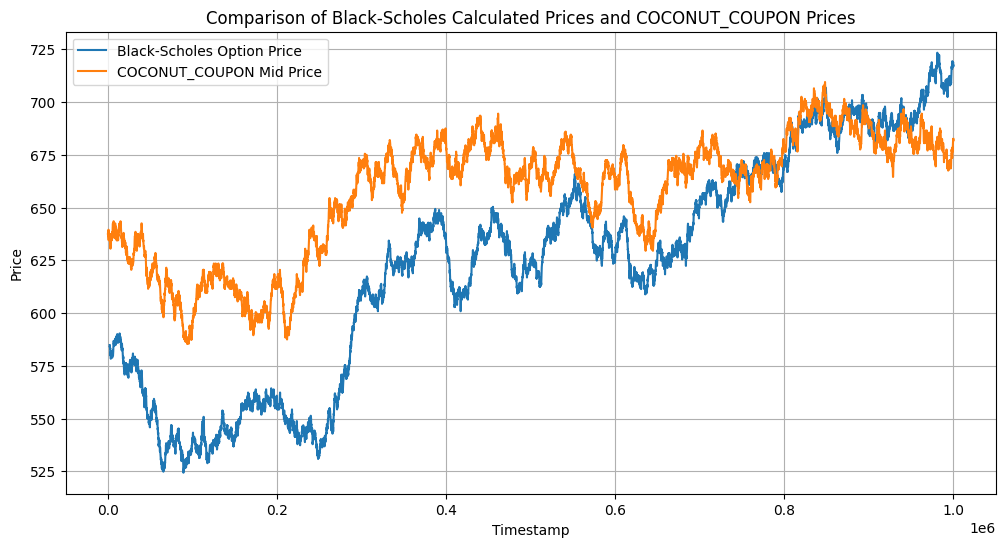

In [85]:
coconut_data["daily_returns"] = coconut_data["mid_price"].pct_change()
coconut_data["rolling_volatility"] = (
    coconut_data["daily_returns"].rolling(window=21).std()
)
coconut_data["annualized_volatility"] = coconut_data["rolling_volatility"] * np.sqrt(
    250
)


# Black-Scholes Model
def black_scholes_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + sigma**2 / 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1, 0, 1) - K * np.exp(-r * T) * norm.cdf(d2, 0, 1)
    return call_price


# Constants for Black-Scholes
K = 10000.0  # example strike price
r = 0.06  # example risk-free rate
T = 1  # time to expiration in years

# Calculate option prices using the Black-Scholes model
coconut_data["option_price"] = coconut_data.apply(
    lambda row: (
        black_scholes_call(row["mid_price"], K, T, r, row["annualized_volatility"])
        if pd.notna(row["annualized_volatility"])
        else np.nan
    ),
    axis=1,
)

# Plotting both Option Prices and COCONUT_COUPON Mid Prices
plt.figure(figsize=(12, 6))
plt.plot(
    coconut_data["timestamp"],
    coconut_data["option_price"],
    label="Black-Scholes Option Price",
)
plt.plot(
    coupon_data["timestamp"],
    coupon_data["mid_price"],
    label="COCONUT_COUPON Mid Price",
)
plt.title("Comparison of Black-Scholes Calculated Prices and COCONUT_COUPON Prices")
plt.xlabel("Timestamp")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

In [90]:
coconut_data[]

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,...,profit_and_loss,price_diff,volatility,vol,daily_returns,rolling_volatility,annualized_volatility,option_price,log_returns,cumulative_volatility
0,1,0,COCONUT,9999,200,NaN,NaN,NaN,NaN,10001,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,100,COCONUT,9999,104,9998.0,44.0,NaN,NaN,10000,...,0.0,-0.5,NaN,NaN,-0.000050,NaN,NaN,NaN,-0.000050,NaN
4,1,200,COCONUT,9998,133,9997.0,62.0,NaN,NaN,9999,...,0.0,-1.0,0.353553,NaN,-0.000100,NaN,0.000559,580.854664,-0.000100,0.000035
7,1,300,COCONUT,9999,149,9998.0,51.0,NaN,NaN,10000,...,0.0,1.0,1.040833,NaN,0.000100,NaN,0.001646,581.854664,0.000100,0.000104
8,1,400,COCONUT,9998,108,9997.0,63.0,NaN,NaN,9999,...,0.0,-1.0,0.946485,NaN,-0.000100,NaN,0.001497,580.854664,-0.000100,0.000095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19991,1,999500,COCONUT,10135,103,10134.0,51.0,NaN,NaN,10136,...,0.0,-0.5,1.110555,0.001676,-0.000049,0.000106,0.001634,717.854664,-0.000049,0.000103
19993,1,999600,COCONUT,10136,130,10135.0,67.0,NaN,NaN,10137,...,0.0,1.0,0.831665,0.001676,0.000099,0.000106,0.001634,718.854664,0.000099,0.000103
19994,1,999700,COCONUT,10134,108,10133.0,54.0,NaN,NaN,10135,...,0.0,-2.0,0.978945,0.001676,-0.000197,0.000106,0.001634,716.854664,-0.000197,0.000103
19997,1,999800,COCONUT,10134,122,10133.0,65.0,NaN,NaN,10136,...,0.0,0.5,1.001388,0.001653,0.000049,0.000105,0.001634,717.354664,0.000049,0.000103


/var/folders/k7/83tjk1tn08x8p9kpdnsx45zh0000gp/T/ipykernel_90744/4276332551.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coconut_data["log_returns"] = np.log(
/var/folders/k7/83tjk1tn08x8p9kpdnsx45zh0000gp/T/ipykernel_90744/4276332551.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coconut_data["cumulative_volatility"] = coconut_data["log_returns"].expanding(1).std()
/var/folders/k7/83tjk1tn08x8p9kpdnsx45zh0000gp/T/ipykernel_90744/4276332551.py:9: SettingWithCopyWarning: 
A value is trying to be 

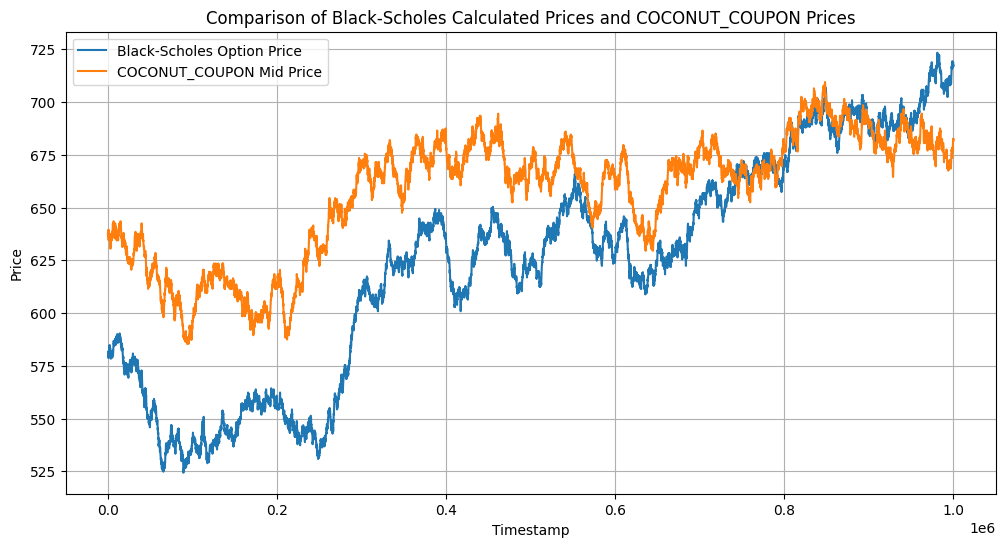

In [89]:
coconut_data["log_returns"] = np.log(
    coconut_data["mid_price"] / coconut_data["mid_price"].shift(1)
)

# Calculate historical volatility using all available data up to each point (cumulative)
coconut_data["cumulative_volatility"] = coconut_data["log_returns"].expanding(1).std()

# Annualize the volatility (assuming 252 trading days in a year)
coconut_data["annualized_volatility"] = coconut_data["cumulative_volatility"] * np.sqrt(
    250
)


# Black-Scholes Model
def black_scholes_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + sigma**2 / 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1, 0, 1) - K * np.exp(-r * T) * norm.cdf(d2, 0, 1)
    return call_price


# Constants for Black-Scholes
K = 10000.0  # example strike price
r = 0.06  # example risk-free rate
T = 1

# Calculate option prices using the Black-Scholes model
coconut_data["option_price"] = coconut_data.apply(
    lambda row: (
        black_scholes_call(row["mid_price"], K, T, r, row["annualized_volatility"])
        if pd.notna(row["annualized_volatility"])
        else np.nan
    ),
    axis=1,
)

# Plotting both Option Prices and COCONUT_COUPON Mid Prices
plt.figure(figsize=(12, 6))
plt.plot(
    coconut_data["timestamp"],
    coconut_data["option_price"],
    label="Black-Scholes Option Price",
)
plt.plot(
    coupon_data["timestamp"],
    coupon_data["mid_price"],
    label="COCONUT_COUPON Mid Price",
)
plt.title("Comparison of Black-Scholes Calculated Prices and COCONUT_COUPON Prices")
plt.xlabel("Timestamp")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
buy_signals = []
sell_signals = []
fair_prices = []

for i in range(len(coupon_data)):
    timestamp = coupon_data.iloc[i]["timestamp"]
    S = coconut_data[coconut_data["timestamp"] == timestamp]["mid_price"].iloc[0]
    K = 10000.0  # Strike price for the option
    T = 1 / 250  # Time to maturity

    # Calculate IV for the current timestep
    coupon_price = coupon_data.iloc[i]["mid_price"]
    iv = calculate_iv_bisection(coupon_price, S, K, T, r)
    iv_list.append(iv)

    # Use the average of past IVs to calculate the fair price of the coupon for the next timestep
    if i > 0:  # Ensure we have at least one past IV value to average
        average_iv = np.mean(iv_list[-window_size:])  # Moving average of IV
        fair_price = black_scholes_call(S, K, T, r, average_iv)
        fair_prices.append((timestamp, fair_price))

        # Determine buy or sell signals
        if coupon_price > fair_price:
            sell_signals.append((timestamp, coupon_price))
        elif coupon_price < fair_price:
            buy_signals.append((timestamp, coupon_price))

# Convert signals into DataFrame for easy plotting
fair_prices_df = pd.DataFrame(fair_prices, columns=["timestamp", "fair_price"])
buy_signals_df = pd.DataFrame(buy_signals, columns=["timestamp", "price"])
sell_signals_df = pd.DataFrame(sell_signals, columns=["timestamp", "price"])

# Plotting actual coupon prices, fair prices, and buy/sell signals
plt.figure(figsize=(14, 7))

# Actual coupon prices
plt.plot(
    coupon_data["timestamp"],
    coupon_data["mid_price"],
    label="Actual COCONUT_COUPON Price",
    color="blue",
    alpha=0.6,
)

# Buy signals
plt.scatter(
    buy_signals_df["timestamp"],
    buy_signals_df["price"],
    label="Buy Signal",
    color="green",
    marker="^",
    alpha=1,
)

# Sell signals
plt.scatter(
    sell_signals_df["timestamp"],
    sell_signals_df["price"],
    label="Sell Signal",
    color="red",
    marker="v",
    alpha=1,
)

# Fair prices (optional, can be plotted if you want to show the fair price line)
# plt.plot(fair_prices_df['timestamp'], fair_prices_df['fair_price'], label='Fair Price', color='orange', alpha=0.6, linestyle='--')

plt.title("Trading Signals and COCONUT_COUPON Prices")
plt.xlabel("Timestamp")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

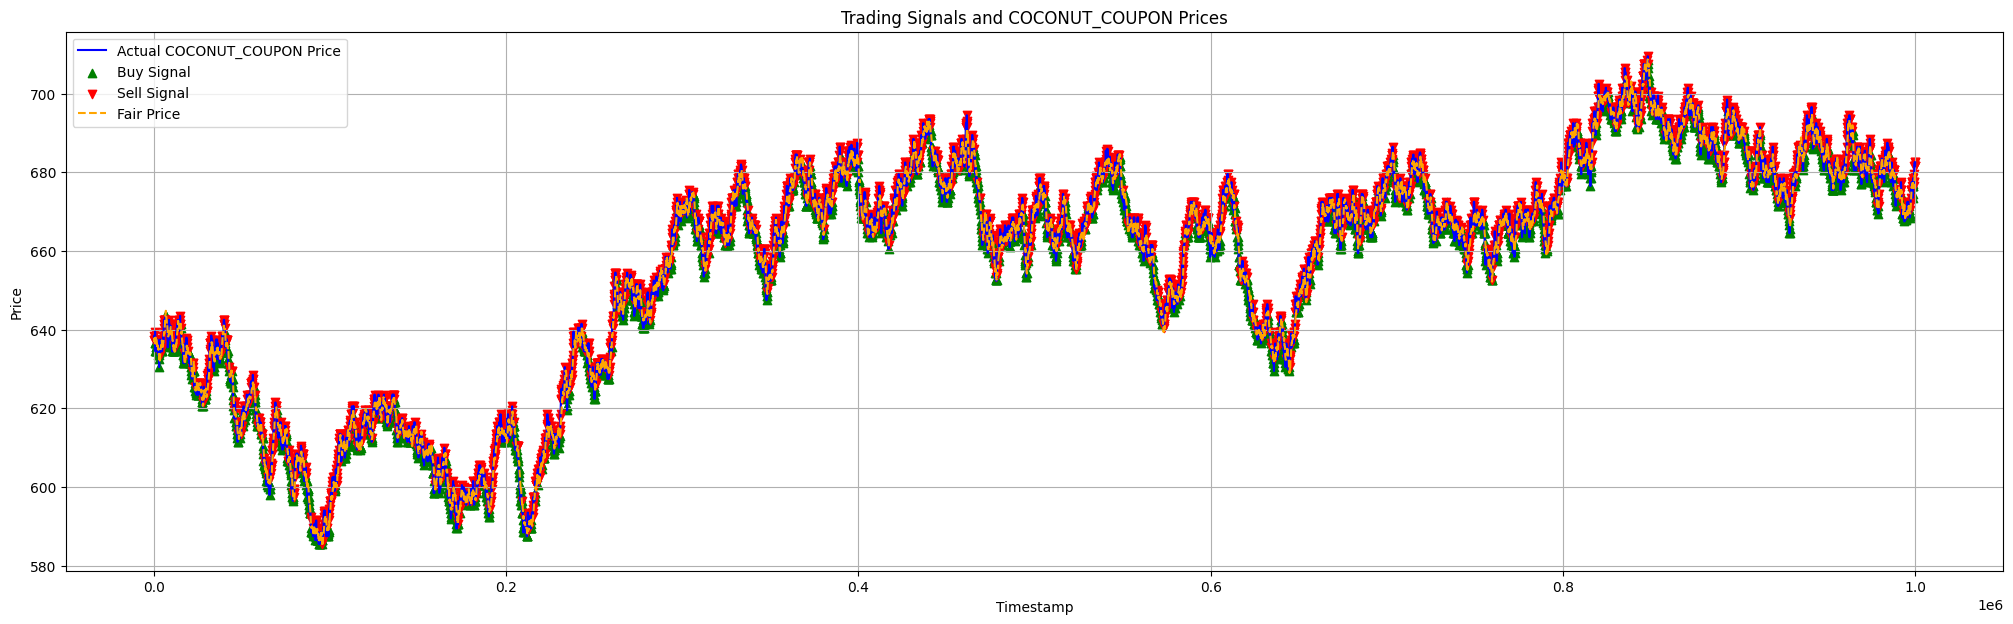

In [95]:
# Black-Scholes model for pricing
def black_scholes_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + sigma**2 / 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)


# Bisection method to solve for IV
def calculate_iv_bisection(target_price, S, K, T, r):
    a, b = 0.0001, 5.0  # Bracket for IV
    tol = 1e-5  # Tolerance
    while b - a > tol:
        sigma = (a + b) / 2
        price = black_scholes_call(S, K, T, r, sigma)
        if price > target_price:
            b = sigma
        else:
            a = sigma
    return sigma


# Constants
r = 0.0  # Risk-free rate
T = 1 / 250  # Time to expiration in years
K = 10000.0  # Strike price

# Initialize lists to store calculated values
iv_list = []  # Store calculated implied volatilities
buy_signals = []  # Timestamps to buy
sell_signals = []  # Timestamps to sell
fair_prices = []  # Store fair prices

# Main loop to calculate IV and fair price, then generate buy/sell signals
for i in range(len(coupon_data)):
    timestamp = coupon_data.iloc[i]["timestamp"]
    S = coconut_data.loc[coconut_data["timestamp"] == timestamp, "mid_price"].iloc[0]
    coupon_price = coupon_data.loc[
        coupon_data["timestamp"] == timestamp, "mid_price"
    ].iloc[0]

    # Calculate implied volatility using the bisection method
    iv = calculate_iv_bisection(coupon_price, S, K, T, r)
    iv_list.append(iv)

    if i > 0:  # Skip the first iteration
        # Use the average of previous IVs to calculate the fair price for the next timestep
        average_iv = np.mean(iv_list[-min(len(iv_list), 10) :])  # 10-day moving average
        fair_price = black_scholes_call(S, K, T, r, average_iv)
        fair_prices.append((timestamp, fair_price))  # Append the fair price to the list

        # Generate trading signals based on the comparison with the fair price
        if coupon_price > fair_price:
            sell_signals.append((timestamp, coupon_price))
        elif coupon_price < fair_price:
            buy_signals.append((timestamp, coupon_price))

# Convert signals into DataFrame for easy plotting
fair_prices_df = pd.DataFrame(fair_prices, columns=["timestamp", "fair_price"])
buy_signals_df = pd.DataFrame(buy_signals, columns=["timestamp", "price"])
sell_signals_df = pd.DataFrame(sell_signals, columns=["timestamp", "price"])

# Plotting actual coupon prices, fair prices, and buy/sell signals
plt.figure(figsize=(25, 7))

# Actual coupon prices
plt.plot(
    coupon_data["timestamp"],
    coupon_data["mid_price"],
    label="Actual COCONUT_COUPON Price",
    color="blue",
)

# Buy signals
plt.scatter(
    buy_signals_df["timestamp"],
    buy_signals_df["price"],
    label="Buy Signal",
    color="green",
    marker="^",
)

# Sell signals
plt.scatter(
    sell_signals_df["timestamp"],
    sell_signals_df["price"],
    label="Sell Signal",
    color="red",
    marker="v",
)

# Fair prices (optional, can be plotted if you want to show the fair price line)
plt.plot(
    fair_prices_df["timestamp"],
    fair_prices_df["fair_price"],
    label="Fair Price",
    color="orange",
    linestyle="--",
)

plt.title("Trading Signals and COCONUT_COUPON Prices")
plt.xlabel("Timestamp")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()